<a href="https://colab.research.google.com/github/libanabduba/Deep-Learning-Lab-AAU/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seeding for reproducibility**

In [17]:
import torch
torch.manual_seed(0)

# If using CUDA (GPU), set seed for reproducibility on GPU as well
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

import numpy as np
np.random.seed(0)


# **Importing the dependencies**

In [18]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# **Data Curation**

In [19]:
# Load the Fashion MNIST dataset without normalization
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


Train dataset size: 60000
Test dataset size: 10000


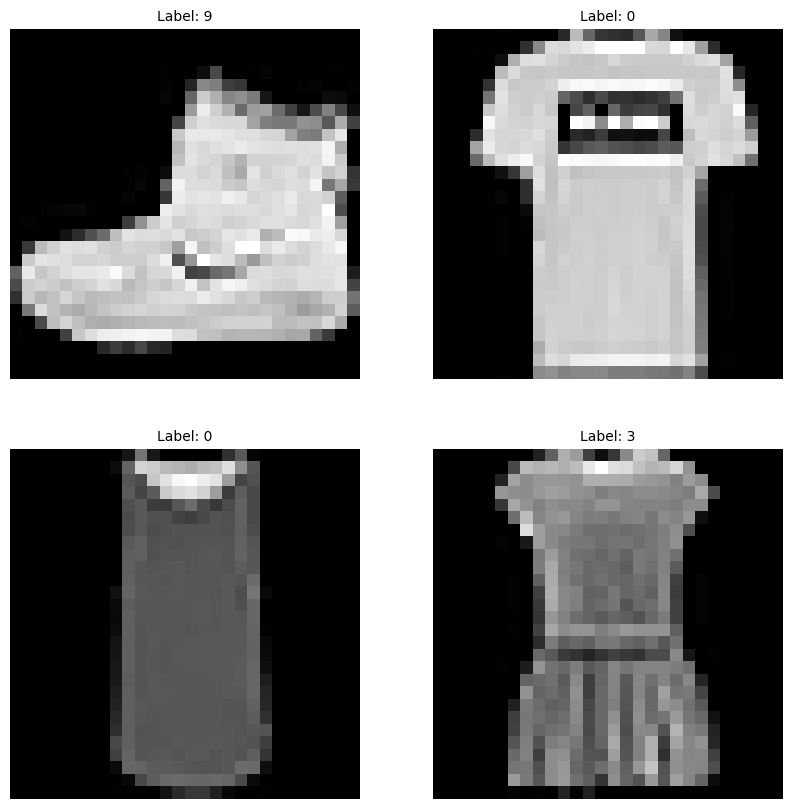

In [20]:

import matplotlib.pyplot as plt
# Print the size of the training and test datasets
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))

# Print the first 4 images and their labels in the training dataset
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(train_dataset[i][0].numpy().reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_dataset[i][1]}", fontsize=10)
    plt.axis('off')
plt.show()


# **Splitting and Examining Sizes of Training and Testing Datasets in PyTorch**

In [21]:
# Split the train_dataset into X_train and y_train
image_train, target_train = train_dataset.data, train_dataset.targets
image_test, target_test = test_dataset.data, test_dataset.targets

# Print the size of image_train, image_test, target_train and target_test
print('image_train size:', image_train.shape)
print('target_train size:', target_train.shape)
print('image_test size:', image_test.shape)
print('target_test size:', target_test.shape)




image_train size: torch.Size([60000, 28, 28])
target_train size: torch.Size([60000])
image_test size: torch.Size([10000, 28, 28])
target_test size: torch.Size([10000])


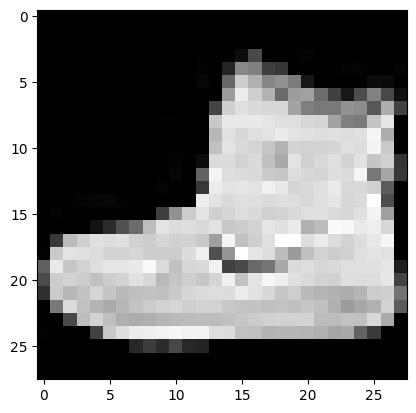

In [22]:
plt.imshow(image_train[0].numpy().reshape(28, 28), cmap='gray')
plt.show()

In [23]:
print(type(image_train[0]))
print(type(target_train[0]))


<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [24]:
print("Image:", image_train[0])
print("Label:", target_train[0])


Image: tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0, 

#**Data Normalization**

In [25]:
image_train = image_train / 255
image_test = image_test / 255


In [26]:
print(image_train[0])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

#**Adjusting Image Dimensions for PyTorch Convolutional Neural Network**#

In [27]:
# Reshape the images in the dataset to specify that each image has a single channel (grayscale) since I am going to feed to CNN
image_train = image_train.unsqueeze(1)
image_test = image_test.unsqueeze(1)

print(image_train.shape)
print(image_test.shape)


torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [28]:
from sklearn.model_selection import train_test_split

image_train, image_val, target_train, target_val = train_test_split(image_train, target_train, test_size=0.2, random_state=0)

print(image_train.shape)
print(image_val.shape)
print(target_train.shape)
print(target_val.shape)


torch.Size([48000, 1, 28, 28])
torch.Size([12000, 1, 28, 28])
torch.Size([48000])
torch.Size([12000])


In [33]:
from google.colab import files
uploaded = files.upload()

Saving nn.svg to nn.svg


#**Displaying CNN Architecture Used**

In [43]:
from IPython.display import Image, display, HTML

image_path = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Display the image
# Set the desired height and width
height = 50
width = 300

# Read the content of the SVG file
svg_content = None
with open(image_path, 'r') as file:
    svg_content = file.read()

# Display the image with specified height and width using HTML
html_code = f'<div style="height: {height}px; width: {width}px;">{svg_content}</div>'
display(HTML(html_code))

In [29]:
import torch.nn.functional as F

class ConvNet(nn.Module):
  def __init__(self):
      super(ConvNet, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
      self.pool = nn.MaxPool2d(kernel_size=2)
      self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
      self.conv3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)
      self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
      self.fc1 = nn.Linear(128, 64)
      self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = self.pool(F.relu(self.conv3(x)))
      x = self.pool(F.relu(self.conv4(x)))
      x = x.view(-1, 128)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

# Create an instance of the ConvNet
model = ConvNet()

# Print the architecture
print(model)


device = "cuda" if torch.cuda.is_available() else "cpu"

model = ConvNet().to(device)
print(model)


ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2):

#Training the model and validating on validation dataset

In [30]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the training and validation images and labels to the device
image_train = image_train.to(device)
target_train = target_train.to(device)
image_val = image_val.to(device)
target_val = target_val.to(device)

# Train the model for a certain number of epochs
num_epochs = 10
for epoch in range(num_epochs):
    # Train the model
    model.train()
    total_loss = 0.0  # Accumulate the total loss for the epoch
    for images, labels in DataLoader(list(zip(image_train, target_train)), batch_size=4, shuffle=True):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.squeeze().long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()  # Accumulate the loss for each batch

    average_loss = total_loss / len(image_train)

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in DataLoader(list(zip(image_val, target_val)), batch_size=4):
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += torch.sum(predictions == labels)
            total += len(labels)

        accuracy = correct / total

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Validation Accuracy: {accuracy:.4f}")



Epoch 1/10, Loss: 0.1159, Validation Accuracy: 0.8802
Epoch 2/10, Loss: 0.0747, Validation Accuracy: 0.8963
Epoch 4/10, Loss: 0.0586, Validation Accuracy: 0.9008
Epoch 5/10, Loss: 0.0559, Validation Accuracy: 0.9055
Epoch 6/10, Loss: 0.0524, Validation Accuracy: 0.9082
Epoch 7/10, Loss: 0.0494, Validation Accuracy: 0.9074
Epoch 8/10, Loss: 0.0484, Validation Accuracy: 0.9077
Epoch 9/10, Loss: 0.0465, Validation Accuracy: 0.9134
Epoch 10/10, Loss: 0.0447, Validation Accuracy: 0.9107


#Testing the model in on 10,000 test dataset

In [57]:
# Evaluate the model on the test dataset
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in DataLoader(list(zip(image_test, target_test)), batch_size=4):
      outputs = model(images)
      predictions = torch.argmax(outputs, dim=1)
      correct += torch.sum(predictions == labels)
      total += len(labels)

  accuracy = correct / total

  # Calculate the test loss
  total_loss = 0.0
  for images, labels in DataLoader(list(zip(image_test, target_test)), batch_size=4):
      outputs = model(images)
      loss = criterion(outputs, labels.squeeze().long())
      total_loss += loss.item()

  average_loss = total_loss / len(image_test)

  print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {average_loss:.4f}")


Test Accuracy: 0.9050, Test Loss: 0.1040


In [58]:
# Save the trained model's parameters
torch.save(model.state_dict(), 'model_parameters.pt')

# Load the saved model's parameters
model.load_state_dict(torch.load('model_parameters.pt'))

# Test the model on a single input image
model.eval()
with torch.no_grad():
    # Get a single image from the test set
    image, label = image_test[0], target_test[0]

    # Move the image to the device
    image = image.to(device)

    # Reshape the image to add a batch dimension
    image = image.unsqueeze(0)

    # Get the model's prediction
    output = model(image)

    # Get the predicted class
    prediction = torch.argmax(output, dim=1)

    # Print the prediction and the actual label
    print(f"Prediction: {prediction}, Actual Label: {label}")



Prediction: tensor([9], device='cuda:0'), Actual Label: 9
